## Text Classification
### A Getting Started Tutorial for Self Learners

This is an unofficial fork of [javedsha/text-classification](https://github.com/javedsha/text-classification)

Not a Jupyter notebook expert? Checkout on how to make the [Best of Jupyter](https://github.com/NirantK/best-of-jupyter) to improve your quality of life :) 

In [1]:
import spacy

from sklearn.datasets import fetch_20newsgroups  # import packages which help us download dataset and load intp python
from sklearn.pipeline import Pipeline

import numpy as np  # numpy package is for fast numerical computation in Python

In [2]:
# Load the filenames and data from the 20 newsgroups dataset
# This will download the datasets if you don't have them already
twenty_train = fetch_20newsgroups(subset='train', shuffle=True, download_if_missing=True)  
twenty_test = fetch_20newsgroups(subset='test', shuffle=True, download_if_missing=True)

In [3]:
# What is this dataset about? 
print(twenty_train.description)

the 20 newsgroups by date dataset


>The 20 Newsgroups data set is a collection of approximately 20,000 newsgroup documents, partitioned (nearly) evenly across 20 different newsgroups.
This has become a popular data set for experiments in  text applications of machine learning techniques, such as text classification and text clustering.
- (from the [official page at qwone](http://qwone.com/~jason/20Newsgroups/))

Let's look at a single document that we need to classify:

In [4]:
twenty_train.data[0]

"From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n"

Let's look at what are all the classes:

In [5]:
twenty_train.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

### Why do we need to convert text to numbers?
>A problem with modeling text is that it is messy, and techniques like machine learning algorithms prefer well defined fixed-length inputs and outputs.
Machine learning algorithms cannot work with raw text directly; the text must be converted into numbers. Specifically, vectors of numbers.

 from Machine Learning Mastery's [Gentle Introduction to Bag of Words](https://machinelearningmastery.com/gentle-introduction-bag-words-model/)

In [6]:
# Extracting features from text files
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(twenty_train.data)
print(f'Shape of Term Frequency Matrix: {X_train_counts.shape}')

Shape of Term Frequency Matrix: (11314, 130107)


In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
print(f'Shape of TFIDF Matrix: {X_train_tfidf.shape}') 

Shape of TFIDF Matrix: (11314, 130107)


**On f-strings:** 
You might have noticed the use of ```f' something goes here: '``` string syntax in the print statement above. They are fast-formatted-strings introduced in Python**3.6** and considerably more Pythonic than the earlier ```.format()``` syntax. 

If you have never used formatter strings from Python3.6, check [f-strings on cito's blog](https://cito.github.io/blog/f-strings/)

Let's try **Naive Bayes** - a popular family of machine learning approches. We try Multinomial Naive Bayes here:

In [8]:
# Machine Learning
# Training Naive Bayes (NB) classifier on training data.
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(X_train_tfidf, twenty_train.target)

In [9]:
# Building a pipeline: We can write less code and do all of the above, by building a pipeline as follows:
text_nb_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf', MultinomialNB())])
text_nb_clf = text_nb_clf.fit(twenty_train.data, twenty_train.target)

In [10]:
predicted = text_nb_clf.predict(twenty_test.data)
naivebayes_clf_accuracy = np.mean(predicted == twenty_test.target) * 100.

In [11]:
print(f'Test Accuracy is {naivebayes_clf_accuracy} %')

Test Accuracy is 77.38980350504514 %


Let's try **Logistic Regression**, which trains faster and is easier to interepret and understand. 

In [12]:
from sklearn.linear_model import LogisticRegression as LR

In [13]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

Wall time: 8.98 s


In [14]:
lr_predicted = text_lr_clf.predict(twenty_test.data)
lr_clf_accuracy = np.mean(lr_predicted == twenty_test.target) * 100.
print(f'Test Accuracy is {lr_clf_accuracy}')

Test Accuracy is 82.79341476367499


We used LR default parameters here. We can later optimize these using GridSearch or RandomSearch to improve accuracy even more. 

If you’re going to remember only one thing from this article, remember to use a linear model for sparse high-dimensional data such as text as bag-of-words or TF-IDF

In [46]:
from sklearn.metrics import confusion_matrix
cf = confusion_matrix(y_true=twenty_test.target, y_pred=lr_predicted)

AttributeError: 'numpy.ndarray' object has no attribute 'to_list'

In [52]:
import json
print(json.dumps(cf.tolist(), indent=2))

[
  [
    236,
    2,
    0,
    0,
    1,
    1,
    3,
    0,
    3,
    3,
    1,
    1,
    2,
    9,
    2,
    35,
    3,
    4,
    1,
    12
  ],
  [
    2,
    304,
    13,
    8,
    8,
    19,
    7,
    1,
    0,
    1,
    0,
    4,
    10,
    1,
    5,
    2,
    1,
    1,
    1,
    1
  ],
  [
    1,
    21,
    294,
    31,
    12,
    10,
    2,
    2,
    1,
    5,
    0,
    1,
    1,
    2,
    4,
    2,
    0,
    0,
    4,
    1
  ],
  [
    0,
    12,
    24,
    283,
    22,
    2,
    13,
    3,
    1,
    1,
    1,
    1,
    24,
    0,
    4,
    0,
    0,
    0,
    0,
    1
  ],
  [
    0,
    5,
    6,
    21,
    319,
    1,
    11,
    1,
    1,
    5,
    1,
    0,
    10,
    0,
    1,
    0,
    0,
    0,
    3,
    0
  ],
  [
    0,
    41,
    38,
    5,
    4,
    292,
    3,
    0,
    1,
    1,
    0,
    1,
    3,
    2,
    4,
    0,
    0,
    0,
    0,
    0
  ],
  [
    0,
    3,
    2,
    12,
    7,
    0,
    351,
    3,
    2,
    1,
  

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

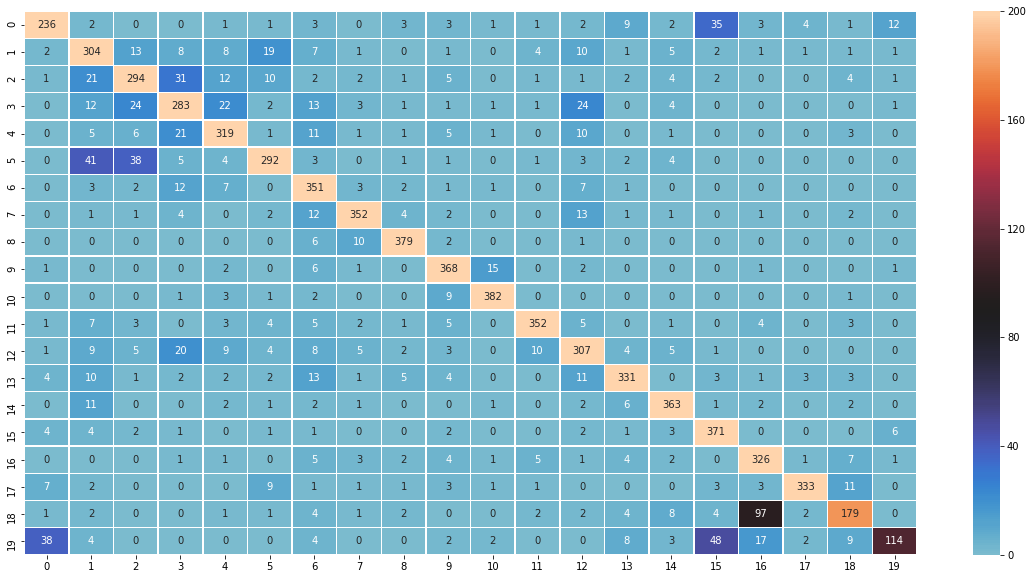

In [42]:
plt.figure(figsize=(20,10))
ax = sns.heatmap(cf, annot=True, fmt="d",linewidths=.5, center = 90, vmax = 200)

### Tricks of Trade
#### Removing Stop Words
They are usually words like *the*, *then*, *a*, *of* etc. Stop words are words which occur too often across documents and don't help disntinguishing one document from another. Removing them from the data is usually the first trick to try. 

You should do this only when stop words are not useful for the underlying problem. In most of the text classification problems, this is indeed not useful. Let’s see if removing stop words increases the accuracy. 

Let's update the code:

In [15]:
nlp = spacy.load('en')

If there is an error above, try:
- Windows:```python -m spacy download en``` as **Administrator**
- Linux:```sudo python -m spacy download en ```

### Exploring spaCy
Let's look at an inside look at words which spaCy considers as stop words

In [16]:
from spacy.lang.en.stop_words import STOP_WORDS
STOP_WORDS

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'could',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',
 'five',
 'for',
 'former',
 'formerly',
 'forty',
 'four',
 'from',
 'front',
 'full',
 'further',
 'get',
 'give',
 'g

In [17]:
f'There are {len(STOP_WORDS)} stopwords in spaCy'

'There are 305 stopwords in spaCy'

In [18]:
# You can add your own corpora specific STOPWORDS using the .add syntax
STOP_WORDS.add("your_additional_stop_word_here")
f'After adding your own stop words, spaCy will use {len(STOP_WORDS)} stopwords'

'After adding your own stop words, spaCy will use 306 stopwords'

In [19]:
doc = nlp("I am learning the most important ideas Natural Language Processing ideas using Python")
print(doc)  # doc is a spaCy object which stores the entire document string

I am learning the most important ideas Natural Language Processing ideas using Python


**About spaCy objects**
- spaCy does some common NLP tasks such as tokenization, stop word analysis and lemmatization the momnent the object is created
- the spaCy tokenization and syntactic parsing is faster than NLTK and much more accurate
- You can learn more at [NLP with spaCy tutorial](https://dataflume.wordpress.com/2017/03/17/intro-nlp-python-spacy/)

spaCy has already tokenized the document and you can iterate over it:

In [20]:
for token in doc:
    print(token)

I
am
learning
the
most
important
ideas
Natural
Language
Processing
ideas
using
Python


In [21]:
simplified_doc = [token for token in doc if not token.is_punct | token.is_stop]
simplified_doc
# please note that .orth_ attribute returns the unicode string representation of the token

[I, learning, important, ideas, Natural, Language, Processing, ideas, Python]

We can also check what other things we know about these tags in the simplified_doc:

In [22]:
for token in simplified_doc:
    print(f'Token:{token.orth_}\tLemmatized:{token.lemma_}\tPart-of-Speech-Tag:{token.pos_}')

Token:I	Lemmatized:-PRON-	Part-of-Speech-Tag:PRON
Token:learning	Lemmatized:learn	Part-of-Speech-Tag:VERB
Token:important	Lemmatized:important	Part-of-Speech-Tag:ADJ
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Natural	Lemmatized:natural	Part-of-Speech-Tag:PROPN
Token:Language	Lemmatized:language	Part-of-Speech-Tag:PROPN
Token:Processing	Lemmatized:processing	Part-of-Speech-Tag:PROPN
Token:ideas	Lemmatized:idea	Part-of-Speech-Tag:NOUN
Token:Python	Lemmatized:python	Part-of-Speech-Tag:NOUN


### Integrating back with our classifier pipeline

In [23]:
??CountVectorizer

In [42]:
from spacy.lang.en import English
tokenizer = English().Defaults.create_tokenizer(nlp)
def spacy_tokenizer(document):
    return [token.orth_ for token in tokenizer(document)]

In [43]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)

Wall time: 10.1 s


In [44]:
def calc_print_accuracy(text_clf, test):
    predictions = text_clf.predict(test.data)
    clf_accuracy = np.mean(predictions == test.target) * 100.
    print(f'Test Accuracy is {clf_accuracy}')
    return clf_accuracy

calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 82.79341476367499


82.79341476367499

In [45]:
%%time
text_lr_clf = Pipeline([('vect', CountVectorizer(tokenizer=spacy_tokenizer, stop_words=list(STOP_WORDS))), ('tfidf', TfidfTransformer()), ('clf',LR())])
text_lr_clf = text_lr_clf.fit(twenty_train.data, twenty_train.target)
calc_print_accuracy(text_lr_clf, twenty_test)

Test Accuracy is 78.18640467339351
Wall time: 3min 19s
